In [4]:
!pip install seaborn

   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   -------- ------------------------------- 61.4/294.8 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.8 kB 1.7 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.8 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 1.7 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed


C:\Users\lucag\AppData\Local\Temp\ipykernel_7476\2248054386.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][long_window:] = np.where(data['Short_MA'][long_window:] > data['Long_MA'][long_window:], 1, 0)


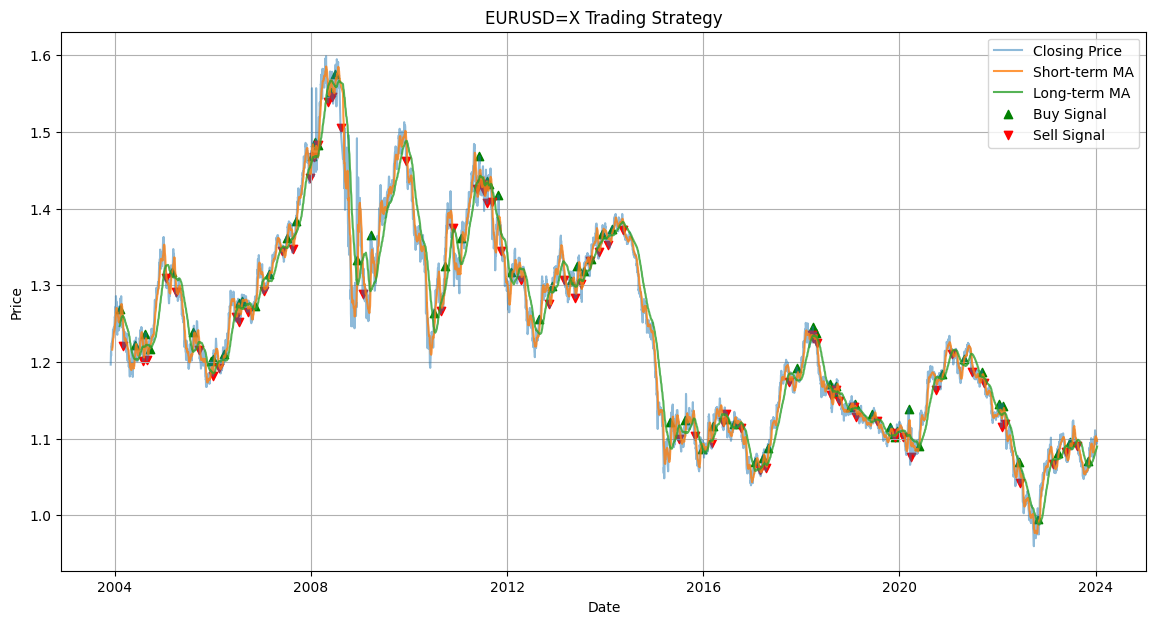

[*********************100%%**********************]  1 of 1 completed
Initial Cash: $10000
Final Portfolio Value: $9593.600698868786
Net Profit/Loss: $-406.3993011312141


C:\Users\lucag\AppData\Local\Temp\ipykernel_7476\2248054386.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][long_window:] = np.where(data['Short_MA'][long_window:] > data['Long_MA'][long_window:], 1, 0)
C:\Users\lucag\AppData\Local\Temp\ipykernel_7476\2248054386.py:46: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '9992.895746369224' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[date, 'Portfolio_Value'] = cash + stock_value


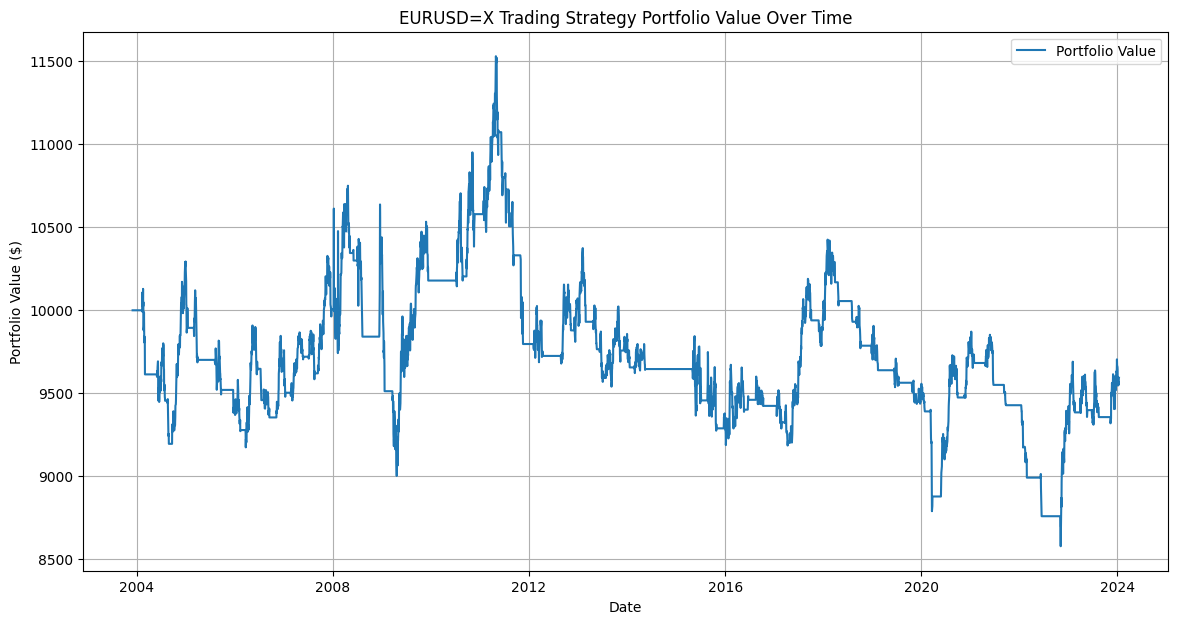

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import itertools

def apply_moving_average_strategy(data, short_window=10, long_window=50):
    """
    Apply moving average crossover strategy.

    :param data: DataFrame with historical data.
    :param short_window: Window for short-term moving average.
    :param long_window: Window for long-term moving average.
    :return: DataFrame with strategy signals.
    """
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    data['Signal'] = 0
    data['Signal'][long_window:] = np.where(data['Short_MA'][long_window:] > data['Long_MA'][long_window:], 1, 0)
    data['Position'] = data['Signal'].diff()
    return data

def calculate_strategy_profits(data, initial_cash=10000):
    """
    Backtest a trading strategy and calculate profits.

    :param data: DataFrame with historical data and strategy signals.
    :param initial_cash: Initial capital for trading.
    :return: Final portfolio value and DataFrame with portfolio value over time.
    """
    cash = initial_cash
    stock_owned = 0
    data['Portfolio_Value'] = initial_cash

    for date, row in data.iterrows():
        if row['Position'] == 1:  # Buy signal
            if cash > 0:
                stock_owned = cash / row['Close']
                cash = 0
        elif row['Position'] == -1:  # Sell signal
            if stock_owned > 0:
                cash = stock_owned * row['Close']
                stock_owned = 0
        stock_value = stock_owned * row['Close']
        data.at[date, 'Portfolio_Value'] = cash + stock_value

    final_value = data['Portfolio_Value'].iloc[-1]
    return final_value, data['Portfolio_Value']


def plot_trading_strategy(data, title):
    """
    Plot the trading strategy, showing closing price, moving averages, and buy/sell signals.

    :param data: DataFrame with historical data and strategy signals.
    :param title: Title for the plot.
    """
    plt.figure(figsize=(14, 7))

    # Plot closing price and moving averages
    plt.plot(data['Close'], label='Closing Price', alpha=0.5)
    plt.plot(data['Short_MA'], label='Short-term MA', alpha=0.8)
    plt.plot(data['Long_MA'], label='Long-term MA', alpha=0.8)

    # Highlight buy signals
    buy_signals = data[data['Position'] == 1]
    plt.scatter(buy_signals.index, data.loc[buy_signals.index]['Close'], marker='^', color='g', label='Buy Signal', alpha=1)

    # Highlight sell signals
    sell_signals = data[data['Position'] == -1]
    plt.scatter(sell_signals.index, data.loc[sell_signals.index]['Close'], marker='v', color='r', label='Sell Signal', alpha=1)

    # Customize and show the plot
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
currency_pair = 'EURUSD=X'
start_date = '2002-01-01'
end_date = datetime.datetime.now().strftime("%Y-%m-%d")
data = yf.download(currency_pair, start=start_date, end=end_date)
data = apply_moving_average_strategy(data)

plot_trading_strategy(data, f'{currency_pair} Trading Strategy')



# Example usage
currency_pair = 'EURUSD=X'
start_date = '2002-01-01'
end_date = datetime.datetime.now().strftime("%Y-%m-%d")
data = yf.download(currency_pair, start=start_date, end=end_date)
data = apply_moving_average_strategy(data)

final_value, portfolio_values = calculate_strategy_profits(data)
print(f"Initial Cash: $10000")
print(f"Final Portfolio Value: ${final_value}")
print(f"Net Profit/Loss: ${final_value - 10000}")

# Plotting (optional)
plt.figure(figsize=(14, 7))
plt.plot(portfolio_values, label='Portfolio Value')
plt.title(f'{currency_pair} Trading Strategy Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid()
plt.show()


### Forex

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

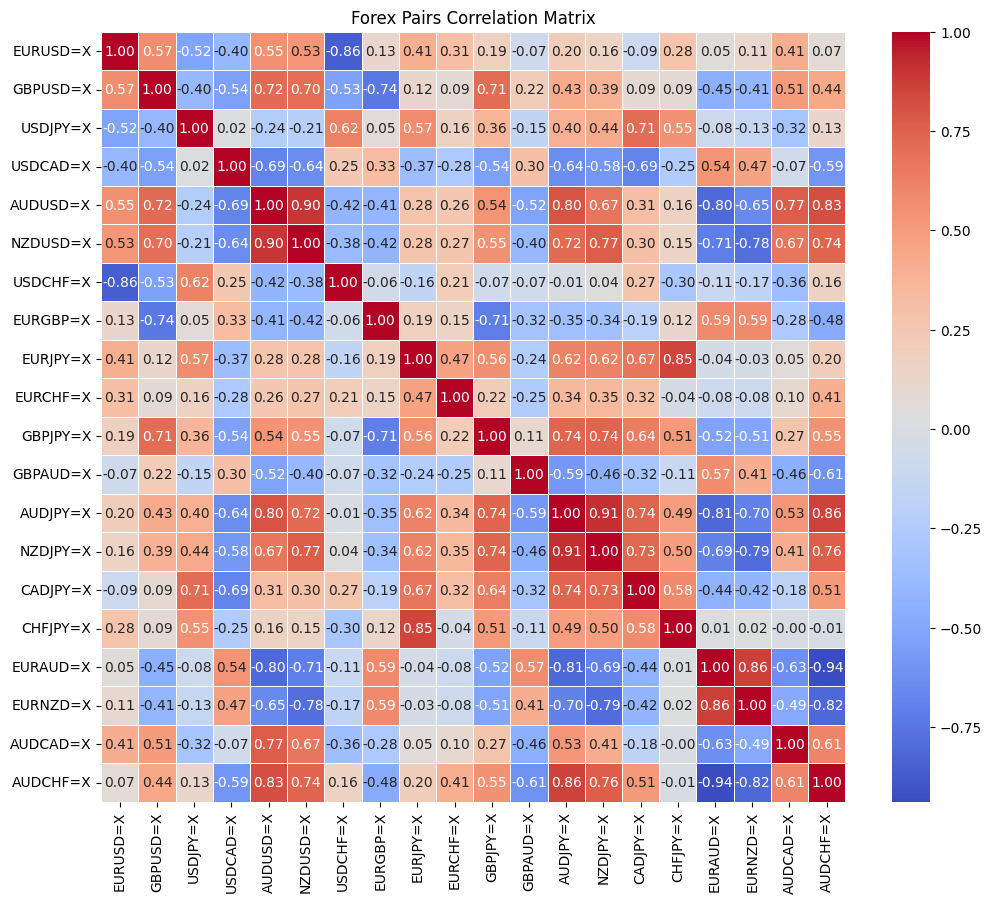

AttributeError: 'list' object has no attribute 'columns'

In [20]:


def compute_correlations(forex_pairs, start_date, end_date, frequency='daily'):
    """
    Compute and plot the correlation matrix for given Forex pairs.

    :param forex_pairs: List of Forex pairs to analyze.
    :param start_date: Start date for the data.
    :param end_date: End date for the data.
    :param frequency: 'daily' or 'weekly' returns.
    """
    # Download historical data
    forex_data = {pair: yf.download(pair, start=start_date, end=end_date)['Close'] for pair in forex_pairs}

    # Create a DataFrame with all close prices
    forex_df = pd.DataFrame(forex_data)

    # Calculate returns based on the specified frequency
    if frequency == 'weekly':
        forex_returns = forex_df.resample('W').ffill().pct_change().dropna()
    else:  # Default to daily
        forex_returns = forex_df.pct_change().dropna()

    # Compute the correlation matrix
    correlation_matrix = forex_returns.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title("Forex Pairs Correlation Matrix")
    plt.show()

    correlated_pairs = []
    for pair1, pair2 in itertools.combinations(forex_pairs, 2):
        if correlation_matrix.loc[pair1, pair2] > threshold:
            correlated_pairs.append((pair1, pair2))

    return correlated_pairs


# Define the list of Forex pairs
forex_pairs = [
    'EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'USDCAD=X', 'AUDUSD=X',
    'NZDUSD=X', 'USDCHF=X', 'EURGBP=X', 'EURJPY=X', 'EURCHF=X',
    'GBPJPY=X', 'GBPAUD=X', 'AUDJPY=X', 'NZDJPY=X', 'CADJPY=X',
    'CHFJPY=X', 'EURAUD=X', 'EURNZD=X', 'AUDCAD=X', 'AUDCHF=X'
]


# Compute correlations
correlation_matrix = compute_correlations(forex_pairs, '2020-01-01', '2021-01-01', frequency='daily')

# Identify pairs with high correlation
highly_correlated_pairs = []
threshold = 0.85

for pair1 in correlation_matrix.columns:
    for pair2 in correlation_matrix.columns:
        if pair1 != pair2 and abs(correlation_matrix.loc[pair1, pair2]) > threshold:
            highly_correlated_pairs.append((pair1, pair2, correlation_matrix.loc[pair1, pair2]))

# Print highly correlated pairs
for pair1, pair2, corr in highly_correlated_pairs:
    print(f"{pair1} and {pair2} have a correlation of {corr:.2f}")

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


C:\Users\lucag\AppData\Local\Temp\ipykernel_7476\100235306.py:38: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Market_Returns'] = df['Pair1'].pct_change()


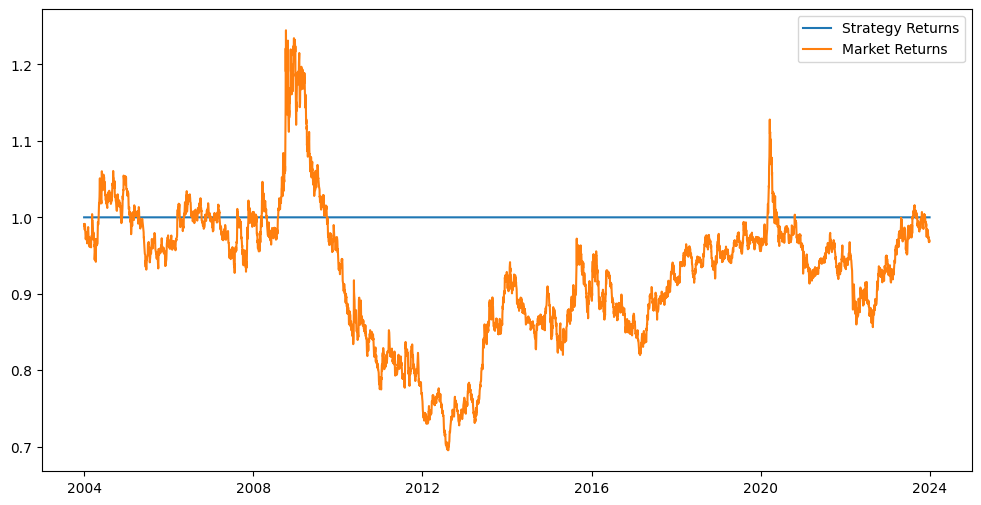

Final Portfolio Value: 1.0


In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def backtest_pair_trading_strategy(pair1, pair2, start_date, end_date, z_entry_threshold=2, z_exit_threshold=0):
    """
    Backtest a pair trading strategy based on z-score of the spread.

    :param pair1: First Forex pair.
    :param pair2: Second Forex pair.
    :param start_date: Start date for the data.
    :param end_date: End date for the data.
    :param z_entry_threshold: Z-score threshold to enter trades.
    :param z_exit_threshold: Z-score threshold to exit trades.
    :return: Final portfolio value and plot of portfolio value over time.
    """
    # Download historical data
    data1 = yf.download(pair1, start=start_date, end=end_date)['Close']
    data2 = yf.download(pair2, start=start_date, end=end_date)['Close']

    # Create a DataFrame for the price ratio
    df = pd.DataFrame(data={'Pair1': data1, 'Pair2': data2})
    df['Price_Ratio'] = df['Pair1'] / df['Pair2']

    # Calculate z-score of the price ratio
    df['Mean'] = df['Price_Ratio'].rolling(window=60).mean()
    df['Std'] = df['Price_Ratio'].rolling(window=60).std()
    df['Z_Score'] = (df['Price_Ratio'] - df['Mean']) / df['Std']

    # Implement the strategy
    df['Position'] = 0
    df['Position'] = np.where(df['Z_Score'] > z_entry_threshold, -1, df['Position'])  # Short Pair1, Long Pair2
    df['Position'] = np.where(df['Z_Score'] < -z_entry_threshold, 1, df['Position'])  # Long Pair1, Short Pair2
    df['Position'] = np.where(df['Z_Score'] * df['Position'] < z_exit_threshold, 0, df['Position'])  # Exit

    # Calculate returns
    df['Market_Returns'] = df['Pair1'].pct_change()
    df['Strategy_Returns'] = df['Market_Returns'] * df['Position'].shift(1)

    # Calculate cumulative returns
    df['Cumulative_Strategy_Returns'] = (1 + df['Strategy_Returns']).cumprod()
    df['Cumulative_Market_Returns'] = (1 + df['Market_Returns']).cumprod()

    # Plot the cumulative returns
    plt.figure(figsize=(12, 6))
    plt.plot(df['Cumulative_Strategy_Returns'], label='Strategy Returns')
    plt.plot(df['Cumulative_Market_Returns'], label='Market Returns')
    plt.legend()
    plt.show()

    # Return the final portfolio value
    final_portfolio_value = df['Cumulative_Strategy_Returns'].iloc[-1]
    return final_portfolio_value

# Example usage
pair1 = 'EURAUD=X'
pair2 = 'AUDCHF=X'
start_date = '2004-01-01'
end_date = '2024-01-01'

final_value = backtest_pair_trading_strategy(pair1, pair2, start_date, end_date)
print(f"Final Portfolio Value: {final_value}")





### Explanation of the Strategy and Function:
- **Data Download**: The function downloads historical closing price data for two currency pairs.
- **Price Ratio**: It computes the price ratio of pair1 to pair2.
- **Z-Score**: The z-score of this price ratio is calculated to identify when the ratio deviates significantly from its historical mean (standardized over a rolling window).
- **Positioning**: The function then takes a position based on the z-score:
  - If the z-score is above the entry threshold, it suggests pair1 is overvalued relative to pair2, so it goes short on pair1 and long on pair2.
  - If the z-score is below the negative entry threshold, it suggests pair1 is undervalued, so it goes long on pair1 and short on pair2.
  - Positions are closed when the z-score comes back within the exit threshold.
- **Returns Calculation**: The strategy's returns are calculated based on these positions.
- **Cumulative Returns**: Cumulative returns of the strategy and the market (pair1) are plotted for comparison.
- **Final Portfolio Value**: The function returns the final portfolio value, showing the performance of the strategy.

### Important Notes:
- **Risk Management**: This strategy assumes equal capital allocation to both pairs and does not include transaction costs or slippage. In real-world scenarios, these factors can significantly impact performance.
- **Parameter Selection**: The choice of `z_entry_threshold` and `z_exit_threshold` is crucial. These should be selected based on historical performance and might need optimization.
- **Market Conditions**: Past performance is not indicative of future results. The strategy should be thoroughly backtested under various market conditions.
- **Execution**: Pair trading strategies require careful execution. Misalignment in the execution of trades in both pairs can lead to unintended risks.

This function provides a basic framework for backtesting a pair trading strategy. For more accurate and comprehensive analysis, consider enhancing the function with additional features like dynamic position sizing, stop-losses, and considering transaction costs.


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

C:\Users\lucag\AppData\Local\Temp\ipykernel_7476\3145916834.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  forex_returns = forex_df.pct_change().dropna()


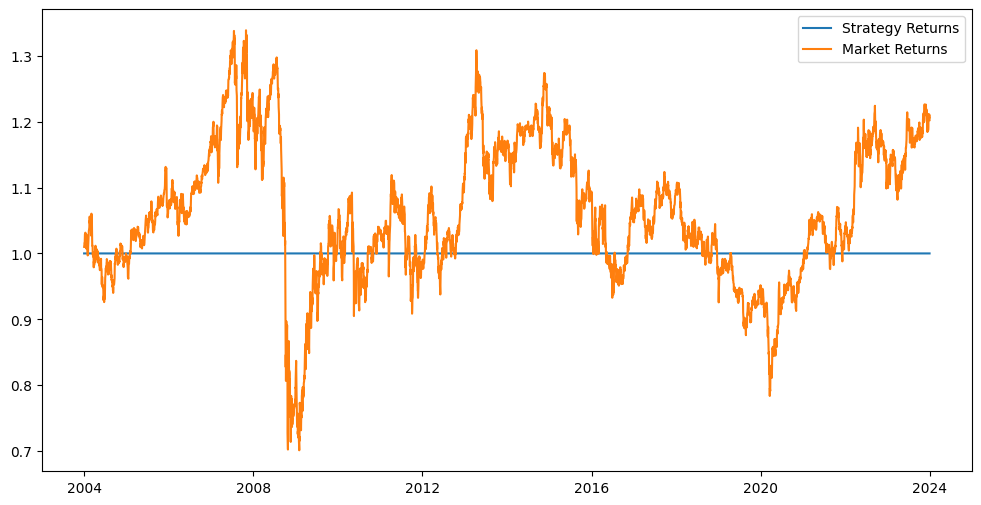

Collective Portfolio Value: 1.0


In [27]:

def get_highly_correlated_pairs(forex_pairs, start_date, end_date, threshold=0.85):
    """
    Identify Forex pairs with correlation above the specified threshold.

    :param forex_pairs: List of Forex pairs to analyze.
    :param start_date: Start date for the data.
    :param end_date: End date for the data.
    :param threshold: Correlation threshold.
    :return: List of tuples with highly correlated pairs.
    """
    forex_data = {pair: yf.download(pair, start=start_date, end=end_date)['Close'] for pair in forex_pairs}
    forex_df = pd.DataFrame(forex_data)
    forex_returns = forex_df.pct_change().dropna()
    correlation_matrix = forex_returns.corr()

    correlated_pairs = []
    for pair1, pair2 in itertools.combinations(forex_pairs, 2):
        if correlation_matrix.loc[pair1, pair2] > threshold:
            correlated_pairs.append((pair1, pair2))

    return correlated_pairs

# Define the list of Forex pairs and identify highly correlated pairs
# Define the list of Forex pairs
forex_pairs = [
    'EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'USDCAD=X', 'AUDUSD=X',
    'NZDUSD=X', 'USDCHF=X', 'EURGBP=X', 'EURJPY=X', 'EURCHF=X',
    'GBPJPY=X', 'GBPAUD=X', 'AUDJPY=X', 'NZDJPY=X', 'CADJPY=X',
    'CHFJPY=X', 'EURAUD=X', 'EURNZD=X', 'AUDCAD=X', 'AUDCHF=X'
]
start_date = '2004-01-01'
end_date = '2024-01-01'
correlated_pairs = get_highly_correlated_pairs(forex_pairs, start_date, end_date)
print("Correlated pairs:", correlated_pairs)
# Apply the trading strategy to each pair and calculate collective portfolio value
collective_portfolio_value = 0
for pair1, pair2 in correlated_pairs:
    final_value = backtest_pair_trading_strategy(pair1, pair2, start_date, end_date)
    collective_portfolio_value += final_value

print(f"Collective Portfolio Value: {collective_portfolio_value}")